In [1]:
import pandas as pd
import seaborn as sns
import sys, os
from matplotlib import rcParams
import matplotlib.pyplot as plt

Data cleaning

In [3]:
sale = pd.read_csv('https://raw.githubusercontent.com/ZorroHZR/schulich_datascience/main/sales_data.csv')

Data cleaning
Sale is a data table of an e-commerce company selling various products, but there are a lot of miss
values in this data table.We need to analyze the performance of our products in different regions
by means of data cleaning in order to develop the company’s sales strategy for next year

In [5]:
sale.info()
#find the dtype and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [9]:
print(sale.shape)
print(sale.columns)

(1050, 5)
Index(['Product', 'Region', 'Price', 'Units Sold', 'Sale Date'], dtype='object')


Find out all missing value

In [14]:
print(sale.isna().sum())

Product       103
Region        104
Price         105
Units Sold    104
Sale Date       0
dtype: int64


Based on this we can know that there are all lot of missing value is exits in this tabel on different value which will afect the analyze, so I decided to use the most comment way to figure out it.


Data Clearning(Drop all missing value)

In [15]:
sale_cleaned = sale.dropna()
sale_cleaned.head()

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07


In [16]:
print(sale_cleaned.shape)

(687, 5)


Due to the large number of missing values, direct deletion leads to a large loss of data, and our
row is reduced by almost half from the original 1050 to the current 687. Drop all missing values
thus leads to a reduction in sample size, which affects the reliability of subsequent analysis and the
accuracy of statistical inference. Especially in cases like ours where the missing values do not occur
randomly, this can lead to biased sample selection.


Data Clearning (Imputation Missing value)

Product, Region, Price, and Units Sold are four column that including missing value.
Choose the appropriate imputaion method according to the type of variabel for different columns and the distribution of data.

Discrete Categorical Varibel As we know “Product”, “Region” and “Units Sold” are Discrete categorical varibel, So the best way to imputated these three varibel is use mode. Mode is the value that occurs most frequently in the data and represents the typical characteristics of the data. By using Mode padding, the characteristics of most of the observed values can be preserved. At the same time, this does not introduce new values or change the distribution of the original data.

In [17]:
modes = sale[['Product', 'Region', 'Units Sold']].mode().iloc[0]

In [18]:
sale.loc[sale['Product'].isna(), 'Product'] = modes['Product']
sale.loc[sale['Region'].isna(), 'Region'] = modes['Region']
sale.loc[sale['Units Sold'].isna(), 'Units Sold'] = modes['Units Sold']


In [19]:
sale.head()

,Product,Region,Price,Units Sold,Sale Date
0,Product_45,Region_6,75.96,10.0,2022-01-01
1,Product_45,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


Continuous Numerical Variables: “Price” is a continuous numerical variables, the best way
to imputation is use mean.The mean is a common central tendency metric used to describe the central location of a distribution of values. Mean padding keeps the overall data average.

In [20]:
price_mean = sale['Price'].mean()
sale.loc[sale['Price'].isna(), 'Price'] = price_mean

In [21]:
sale.head()

,Product,Region,Price,Units Sold,Sale Date
0,Product_45,Region_6,75.96,10.0,2022-01-01
1,Product_45,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


In [23]:
print(sale.isna().sum())

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
dtype: int64


Overall, it is significantly more friendly to our data than directly deleting our missing value imputation. Filling in missing values maximizes the retention of more valid samples and thus reduces
information loss. This is especially important in cases where the proportion of missing values is
high or the sample size is limited. It also helps that we can maintain the structure and shape of
the dataset for subsequent analysis and modeling processes. It can also help me to reach the point
of obtaining more potential information using other variables or correlations between data points
to estimate missing values, thus retaining as much information as possible in the data.

Exploratory Analysis: 
Analyze product performance

In [24]:
# Total revenue by everyday
sale['Total Revenue'] = sale['Price'] * sale['Units Sold']
sale.head()

,Product,Region,Price,Units Sold,Sale Date,Total Revenue
0,Product_45,Region_6,75.96,10.0,2022-01-01,759.60
1,Product_45,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14


In [26]:
# Every product's revenue
product_revenue = sale.groupby('Product')['Total Revenue'].sum()
product_stats = sale.groupby('Product').agg({'Price': 'mean', 'Units Sold':'mean'})
best_selling_products_by_revenue = product_revenue.nlargest(5)
best_selling_products_by_units = product_stats['Units Sold'].nlargest(5)

In [28]:
# Most revenue product
best_selling_products_by_revenue

Product
Product_45    126670.157291
Product_31     31616.330000
Product_26     31453.562127
Product_29     30621.068190
Product_30     30179.470000
Name: Total Revenue, dtype: float64

In [29]:
#Best selling
best_selling_products_by_units


Product
Product_3     11.636364
Product_50    11.380952
Product_10    11.000000
Product_21    11.000000
Product_41    11.000000
Name: Units Sold, dtype: float64

In [33]:
print("Top-selling products by revenue:")
for product in best_selling_products_by_revenue.index:
    print("-" + product)

Top-selling products by revenue:
-Product_45
-Product_31
-Product_26
-Product_29
-Product_30


Our data analysis shows that the five products with the highest sales revenue are 45, 31, 29, 26,and product 30.

In [34]:
print("\nTop-selling products by units sold:")
for product in best_selling_products_by_units.index:
    print("- " + product)


Top-selling products by units sold:
- Product_3
- Product_50
- Product_10
- Product_21
- Product_41


Based on the data shows that we should continue to produce these five products. Based on this information, we should increase production because the highest sales volume and demand are also the highest. Where the number of products 10, 21, and 41 is consistent. From the side of the reflection, these three products may be homogeneous. We should produce more homogeneous products.

We found that products with high e-commerce sales may have lower margins, i.e., lower profits per unit of product sold. Despite increased sales volume, low margins may result in low total profits. There are some potential factors, such as uncontrollable costs. A product with high sales volume may lead to low total gain if there are problems of improper cost control in production and operation, such as high raw material costs, high labour costs or low efficiency.
To address this situation, consider these issues we can take. Increase profitability and optimize pricing strategies to increase profitability per product unit by improving product design, reducing production costs, finding more efficient supply chain partners, etc. Reduce costs, product mix optimization, and increase added value. That means we can combine products with high sales volume but low profit with other high-profit products to compensate for the low profit of high-volume products by maximizing the overall profit.
.

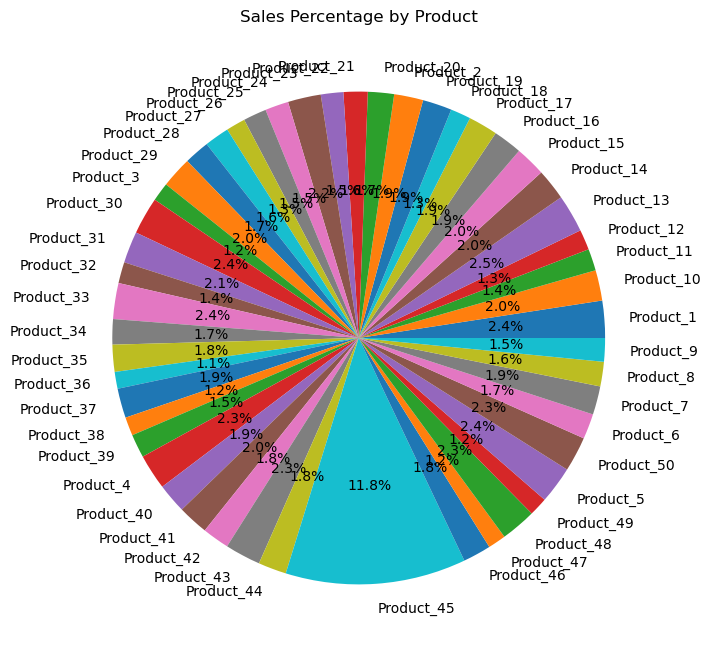

In [35]:
import matplotlib.pyplot as plt
# every product percentage
product_sales = sale.groupby('Product')['Units Sold'].sum()
total_sales = product_sales.sum()
sales_percentage = (product_sales / total_sales) * 100
# Visualization
plt.figure(figsize=(8, 8))
plt.pie(sales_percentage, labels=product_sales.index, autopct='%1.1f%%')
plt.title('Sales Percentage by Product')
plt.show()

Product 45 has the highest sales share of 11.8. This means that Product 45 is performing well in sales and making a significant contribution to overall sales. It indicates that Product 45 has high demand and appeal in the market and may be a popular product for consumers. It may have better features, performance or competitiveness compared to other products, thus attracting more consumers to buy it.

Analyze regional performance

In [36]:
#total revenue in each region
regional_revenue = sale.groupby('Region')['Total Revenue'].sum()

In [37]:
#the average price, average units sold, and total revenue for each region
regional_stats = sale.groupby('Region').agg({'Price': 'mean', 'Units Sold':'mean', 'Total Revenue': 'sum'})

In [38]:
#the top-performing regions based on total revenue or the highest average units␣sold
top_regions_by_revenue = regional_revenue.nlargest(5)
top_regions_by_units = regional_stats['Units Sold'].nlargest(5)

In [39]:
print("\nTop_regions_by_revenue:")
for revenue in top_regions_by_revenue.index:
    print("- " + revenue)


Top_regions_by_revenue:
- Region_9
- Region_8
- Region_10
- Region_4
- Region_2


Based on the groupby method, we can calculate the revenue of regional products and the number of products. The regional revenue ranking shows that regions 9, 8, 10, 4, and 2 are the highest revenue earners.


In [40]:
print("\nTop_regions_by_units:")
for regions in top_regions_by_units.index:
    print("- " + regions)



Top_regions_by_units:
- Region_3
- Region_1
- Region_10
- Region_6
- Region_9


In the regions with the highest product sales, we calculated regions 3, 1, 10, 6, and 9. These five regions consume the most products.


In [46]:
#the performance of regions for each product
region_performance_by_product = sale.groupby(['Region', 'Product']).agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})
region_performance_by_product

Total Revenue  Units Sold
Region   Product                              
Region_1 Product_1     3071.100000        42.0
         Product_10    1398.782942        13.0
         Product_12     260.080000         8.0
         Product_13    1496.020000        46.0
         Product_14    1042.100000        10.0
...                            ...         ...
Region_9 Product_50    4029.710000        30.0
         Product_6      459.520000        32.0
         Product_7     9671.830000        56.0
         Product_8     1031.640000        12.0
         Product_9       22.410000         9.0

[414 rows x 2 columns]

These results provide data on the best-performing products and regions based on revenue and units sold. By focusing on these top-selling products and regions, we enable you to prioritize your sales strategy and allocate resources effectively. For example, in terms of product production, I recommend that manufacturers increase production in 3, 50, 10, 21, 41. Secondly, manufacturers should pay attention to products 45, 31, 26, 29, and 30 if they want to increase revenue. These are the products with the highest revenue. In addition, analyzing the regional performance of each product can help identify specific regions where certain products perform exceptionally well. For example, we can rationalize the number of products based on the demand in each region and increase the supply of goods in regions 3, 1, 10, 6, and 9. In addition, we can analyze the regions and find that regions 9 and 10 are the ones with the higher consumption and also the higher revenue. We can conduct marketing campaigns and sales activities according to the areas with high revenue and consumption. This information can guide targeted marketing efforts and identify growth opportunities in specific regions.

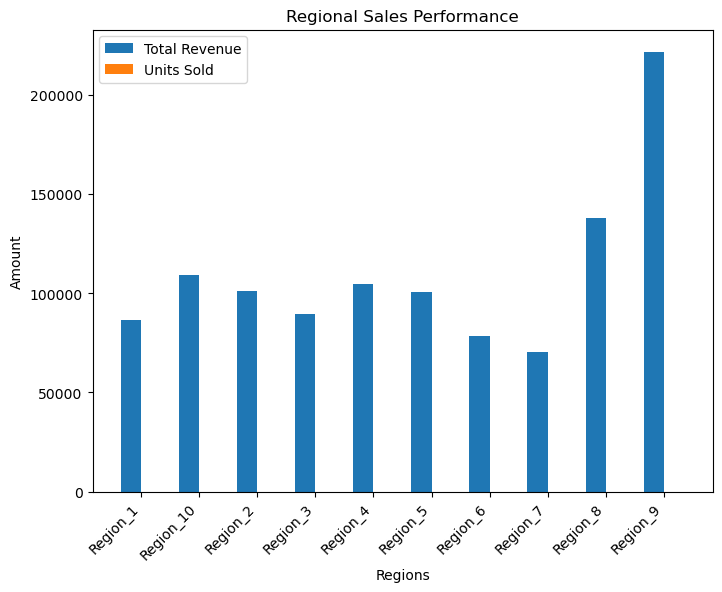

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
regions = regional_stats.index
revenue = regional_stats['Total Revenue']
units_sold = regional_stats['Units Sold']
bar_width = 0.35
index = list(range(len(regions)))
bar1 = ax.bar(index, revenue, bar_width, label='Total Revenue')
bar2 = ax.bar([i + bar_width for i in index], units_sold, bar_width,label='Units Sold')
ax.set_xlabel('Regions')
ax.set_ylabel('Amount')
ax.set_title('Regional Sales Performance')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend()
plt.show()

In this histogram showing Region 9 with the highest bars, it means that the region is performing best in terms of total revenue or average units sold. In this case, the highest histogram for Region 9 means that it is performing best in both metrics.

Suggestion: According to these ten regions, we can raise prices in the regions with substantial spending power because these two regions have strong purchasing power and can increase revenue. Of course, compared to other areas with weak purchasing power, we can conduct promotions or other marketing activities similar to Uber's coupon code to reduce customer churn and increase sales.

Trends over time


In [49]:
sale['Sale Date'] = pd.to_datetime(sale['Sale Date'])
sale['Month'] = sale['Sale Date'].dt.month
sale['Quarter'] = sale['Sale Date'].dt.quarter
monthly_data = sale.groupby('Month').agg({'Units Sold': 'mean', 'Total Revenue':'sum'})
quarterly_data = sale.groupby('Quarter').agg({'Units Sold': 'mean', 'Total Revenue': 'sum'})

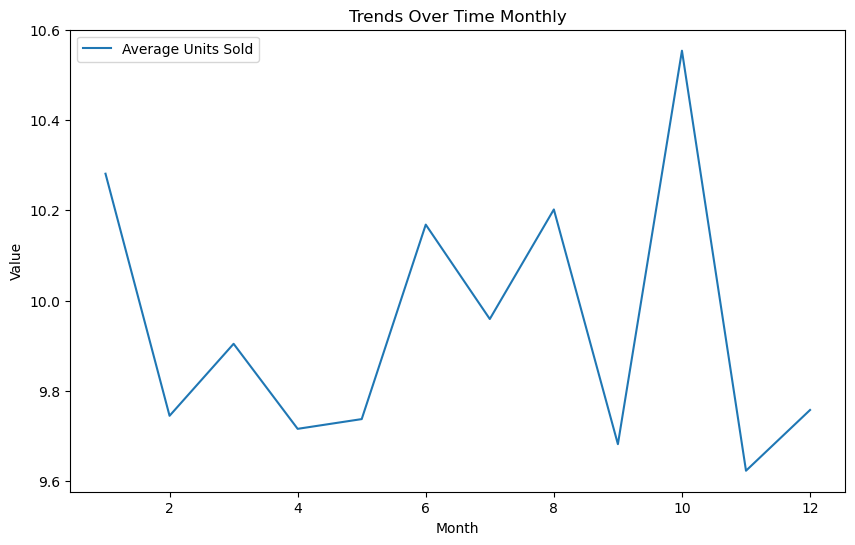

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Units Sold'], label='Average Units Sold')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Trends Over Time Monthly')
plt.legend()
plt.show()

In the monthly data, the overall sales situation is more tortuous, with February-August sales being more subdued, while January and October are the more peak periods This may indicate that seasonal factors have an impact on sales. January and October are the months when there maybe specific seasonal demand or peak sales periods. This may be influenced by holidays, seasonal changes, specific events or promotions. For example, January may be driven by the New Year’s shopping season, while October may be driven by the holiday shopping season.

Based on the monthly data line chart, we can analyze that the company should start to prepare the stock in the early part of January and October and also deal with these special periods to promote the products to increase sales and ensure that they do not lose customers in different months.

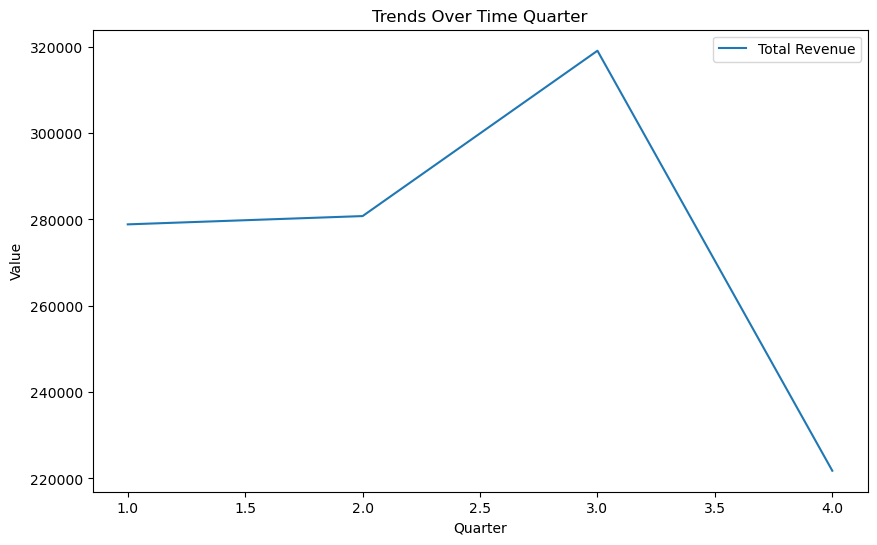

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(quarterly_data.index, quarterly_data['Total Revenue'], label='Total Revenue')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Trends Over Time Quarter')
plt.legend()
plt.show()

Sales remained relatively stable between Quarter 1 and Quarter 2, fluctuating at the 280,000 level.From quarter 2 to quarter 3, sales suddenly rise to a new high of 320,000. from quarter 3 to quarter 4, sales experience an extremely rapid decline to 220,000. there may be seasonal trends or cyclical changes in demand between quarters. For example, quarter 3 may be a peak sales period, while quarter 4 may be a slow sales period. This may be influenced by seasonal changes, holidays, promotions and other factors.
The data analysis we will combine with our monthly and quarterly reports can provide a more comprehensive view and help us understand sales trends and issues. 
Sales are significantly higher in Quarter 3 than in other quarters and also peak in January and October in the monthly reports. This may suggest the presence of some sort of seasonal demand or spending habits, possibly related to holidays, shopping seasons or other factors. Companies can further study and use these peak periods to develop marketing strategies and promotions accordingly.
Quarter 4 sales were down significantly and were relatively low in the monthly reports from February to August. This may imply that there was weak market demand, increased competition or other factors that caused sales to decline during this period. Companies can further analyze specific causes, such as competitors’ promotions, changes in consumer buying habits, etc., and consider corresponding market adjustments or strategy improvements.
Other trends and issues may be identified in the monthly report, such as fluctuations in sales from month to month, sales performance of specific products or regions, etc. These trends can help a company identify sales strengths and weaknesses and develop targeted sales strategies and goals accordingly.